In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from matplotlib import pyplot as plt

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [564]:
data = pd.read_csv(r"C:\Users\97798\Desktop\laptop_data.csv")

In [565]:
data.drop(['Unnamed: 0'], axis =1 ,inplace = True)

In [566]:
data.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [569]:
data.Ram = data.Ram.str.replace('GB','')

In [570]:
data.Ram =data.Ram.astype('int32')

In [339]:
data.Weight = data.Weight.astype('float32')

In [571]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [572]:
data.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: xlabel='Company'>

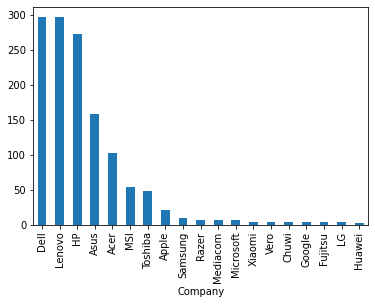

In [573]:
data.Company.value_counts().plot(kind = 'bar')

<Axes: xlabel='TypeName'>

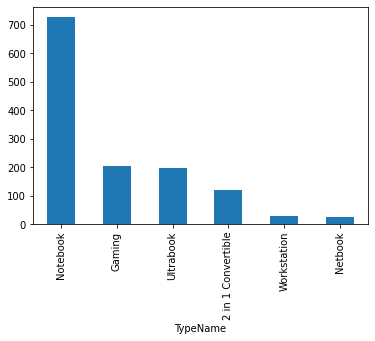

In [360]:
data.TypeName.value_counts().plot(kind= 'bar')

In [574]:
data.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [575]:
aa = data.groupby('Company').Price.agg('mean')

In [576]:
aa.sort_values(ascending=False)

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

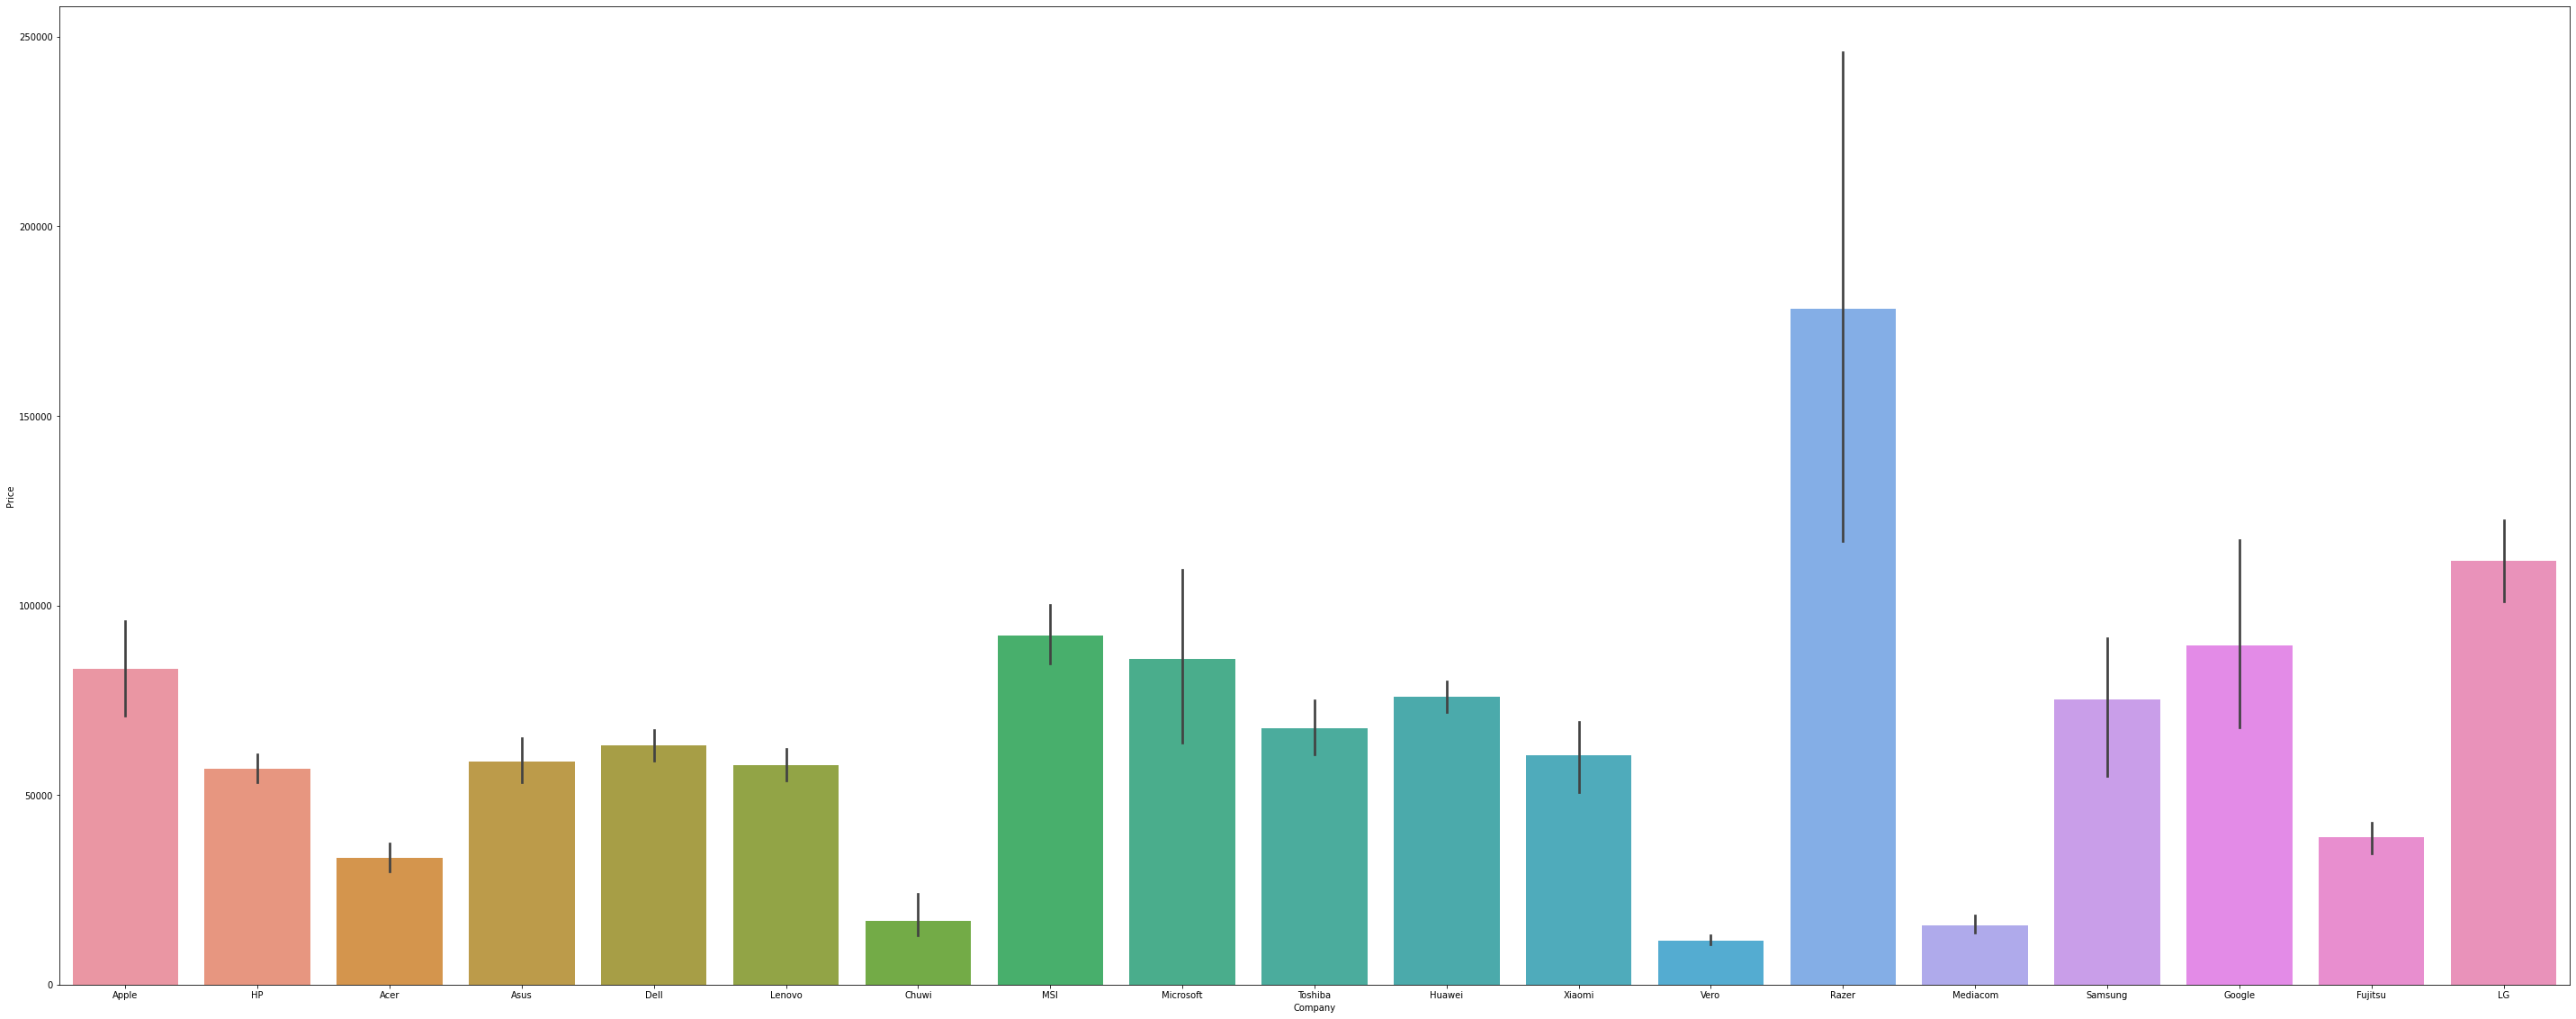

In [577]:
plt.figure(figsize=(50,20))

sns.barplot(
    data = data,
    x = 'Company',
    y= 'Price',
    
)

plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

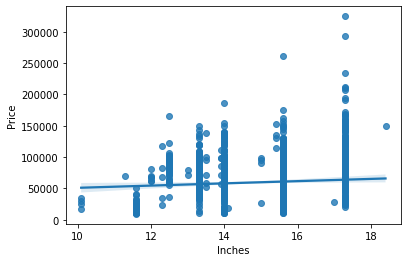

In [578]:
sns.regplot(
    y='Price',
    x='Inches',
    data=data
    
    
)

In [579]:
data.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [580]:
data['touch_screen'] = data['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)


In [581]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0


<Axes: xlabel='touch_screen', ylabel='Price'>

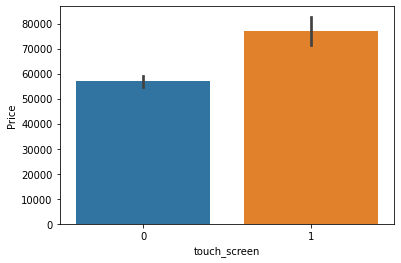

In [582]:
sns.barplot(
    data = data,
    x = 'touch_screen',
    y = 'Price'
   
)

In [583]:
data['ips_panel'] = data['ScreenResolution'].str.contains('IPS', case=False).astype(int)


In [584]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,ips_panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0


<Axes: xlabel='ips_panel', ylabel='Price'>

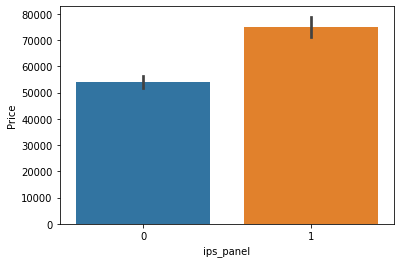

In [585]:
sns.barplot(
    data = data,
    x = 'ips_panel',
    y= 'Price'
   
   
)

In [586]:
data.ScreenResolution.str.split('x', n=1, expand = True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [587]:
new = data.ScreenResolution.str.split('x', n=1, expand = True)

In [588]:
data['xres'] = new[0]
data['yres'] = new[1]

In [589]:
data.xres.value_counts()

xres
Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920         

In [590]:
import re

strings = data.xres
numbers = []
for string in strings:
    extracted_numbers = re.findall(r'\d+', string)
    numbers.extend(extracted_numbers)

print(numbers)


['2560', '1440', '1920', '2880', '2560', '1366', '2880', '1440', '1920', '1920', '1366', '1920', '2880', '1920', '2304', '2560', '1920', '2880', '1920', '1920', '1366', '1920', '1366', '1920', '1920', '1366', '1440', '1920', '1920', '1920', '1920', '1366', '1920', '3200', '1440', '1366', '1366', '1920', '1366', '1920', '1920', '1920', '1366', '1920', '1920', '2560', '1366', '1920', '1920', '1366', '1920', '1920', '1920', '1920', '1366', '1920', '1920', '1366', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1366', '1366', '1920', '1920', '2256', '1920', '1920', '1920', '1366', '1920', '1920', '1920', '1920', '1920', '1920', '2304', '1920', '1920', '1366', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '2256', '1920', '1920', '1920', '1920', '1920', '1920', '3200', '1920', '1366', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1366',

In [591]:
import re
import pandas as pd

# Assuming `data` is your DataFrame

data['xres'] = data['xres'].str.replace(',', '')  # Remove commas

def extract_numbers(string):
    extracted_numbers = re.findall(r'\d+', string)
    return extracted_numbers[0] if extracted_numbers else None

data['xres'] = data['xres'].apply(extract_numbers)  # Extract numbers

print(data['xres'])


0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: xres, Length: 1303, dtype: object


In [592]:
data.yres = data.yres.astype('int')

In [593]:

data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
touch_screen          int32
ips_panel             int32
xres                 object
yres                  int32
dtype: object

In [594]:
data.drop(['ScreenResolution'], axis =1, inplace=True)

In [595]:
data.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [596]:
data['Cpu Name'] = data['Cpu'].str.split(' ').str.get(0) + ' ' + data['Cpu'].str.split(' ').str.get(1) + ' '+ data['Cpu'].str.split(' ').str.get(2)


In [597]:
data['Cpu Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [598]:
def classify_processor(processor):
    if "Intel Core i7" in processor:
        return 'Intel Core i7'
    elif "Intel Core i5" in processor:
        return 'Intel Core i5'
    elif "Intel Core i3" in processor:
        return 'Intel Core i3'
    elif "Intel" in processor:
        return 'Other Intel Processor'
    elif "AMD" in processor:
        return 'AMD Processor'
    else:
        return 'Unknown'
    

In [599]:
data['Cpu Name'] = data['Cpu Name'].apply(classify_processor)

<Axes: xlabel='Cpu Name'>

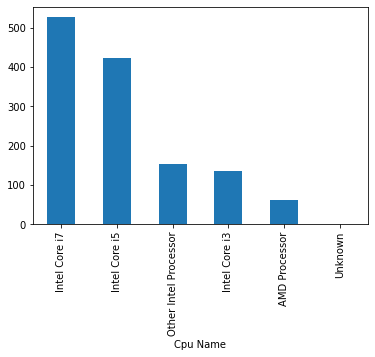

In [600]:
data['Cpu Name'].value_counts().plot(kind = 'bar')

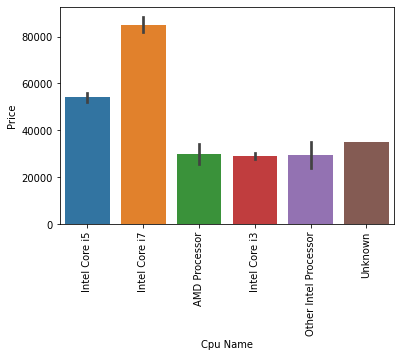

In [601]:
plt.tight_layout()

sns.barplot(
    data = data,
    x = 'Cpu Name',
    y = 'Price'
)

plt.xticks(rotation = 'vertical')
plt.show()

In [602]:
data.drop(['Cpu'], axis =1,inplace = True)

In [603]:
data

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,ips_panel,xres,yres,Cpu Name
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1,1,1920,1080,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1,1,3200,1800,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,0,0,1366,768,Other Intel Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,Intel Core i7


<Axes: ylabel='Ram'>

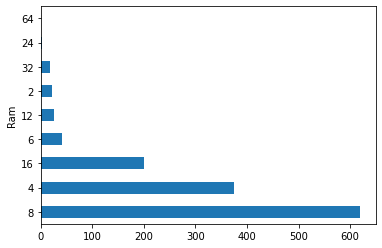

In [604]:
data.Ram.value_counts().plot(kind = 'barh')

<Axes: xlabel='Ram', ylabel='Price'>

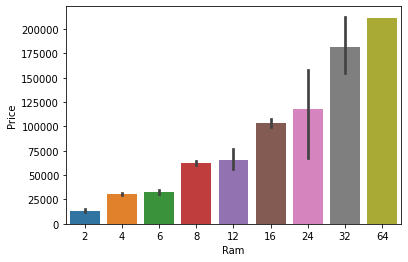

In [494]:
sns.barplot(
    data = data,
    x ='Ram',
    y = 'Price'
)

In [605]:
data.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [622]:
import pandas as pd
import re

data1 = data.Memory
# Create a DataFrame from the array
df = pd.DataFrame({'data': data1})

# Extract the drive type and size
df['Drive Type'] = df['data'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)', flags=re.IGNORECASE)
df['Size'] = df['data'].str.extract(r'(\d+\.\d+|\d+)GB', flags=re.IGNORECASE).fillna('1')

# Store the actual size values in separate columns
df['Size_Flash Storage'] = df[df['Drive Type'] == 'Flash Storage']['Size']
df['Size_HDD'] = df[df['Drive Type'] == 'HDD']['Size']
df['Size_Hybrid'] = df[df['Drive Type'] == 'Hybrid']['Size']
df['Size_SSD'] = df[df['Drive Type'] == 'SSD']['Size']

# Display the DataFrame
df = df[['Size_Flash Storage','Size_HDD','Size_Hybrid','Size_SSD']]

In [629]:
data = data.loc[:, ~data.columns.duplicated()]
        


In [641]:
data['Size_SSD'] = data['Size_SSD'].replace(np.nan, 0)

C:\Users\97798\AppData\Local\Temp\ipykernel_1880\513889156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size_SSD'] = data['Size_SSD'].replace(np.nan, 0)


In [643]:
data.drop(['Memory'], axis =1, inplace=True)

C:\Users\97798\AppData\Local\Temp\ipykernel_1880\1740278356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Memory'], axis =1, inplace=True)


In [658]:
def classify_processor(processor):
    if "Intel" in processor:
        return 'Intel'
    elif "Nvidia" in processor:
        return 'Nvidia'
    elif "AMD" in processor:
        return 'AMD'
    elif "ARM" in processor:
        return 'ARM'
    else:
        return 'Unknown'
    

In [659]:
classify_processor(data.Gpu)

'Unknown'

In [660]:
data['Gpu'] = data.Gpu.apply(classify_processor)

C:\Users\97798\AppData\Local\Temp\ipykernel_1880\3114822737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gpu'] = data.Gpu.apply(classify_processor)


In [661]:
data

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,touch_screen,ips_panel,xres,yres,Cpu Name,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,Apple,Ultrabook,13.3,8,Unknown,macOS,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,0,0,128
1,Apple,Ultrabook,13.3,8,Unknown,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,128,0,0,0
2,HP,Notebook,15.6,8,Unknown,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,0,0,256
3,Apple,Ultrabook,15.4,16,Unknown,macOS,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,0,0,512
4,Apple,Ultrabook,13.3,8,Unknown,macOS,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Unknown,Windows 10,1.8,33992.6400,1,1,1920,1080,Intel Core i7,0,0,0,128
1299,Lenovo,2 in 1 Convertible,13.3,16,Unknown,Windows 10,1.3,79866.7200,1,1,3200,1800,Intel Core i7,0,0,0,512
1300,Lenovo,Notebook,14.0,2,Unknown,Windows 10,1.5,12201.1200,0,0,1366,768,Other Intel Processor,64,0,0,0
1301,HP,Notebook,15.6,6,Unknown,Windows 10,2.19,40705.9200,0,0,1366,768,Intel Core i7,0,1,0,0


In [654]:
data.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [655]:
def classify_os(processor):
    if "Windows 10" in processor:
        return 'Windows'
    elif "Windows 7" in processor:
        return 'Windows'
    elif "Windows 10 S" in processor:
        return 'Windows'
    elif "macOS" in processor:
        return 'MAC'
    elif "Mac OS X" in processor:
        return 'MAC'
    else:
        return 'Others'
    

In [662]:
data.OpSys = data.OpSys.apply(classify_os)

C:\Users\97798\AppData\Local\Temp\ipykernel_1880\2229675815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.OpSys = data.OpSys.apply(classify_os)


In [664]:
data.drop(['Gpu'], axis =1, inplace = True)

C:\Users\97798\AppData\Local\Temp\ipykernel_1880\885406052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Gpu'], axis =1, inplace = True)


<Axes: xlabel='OpSys', ylabel='Price'>

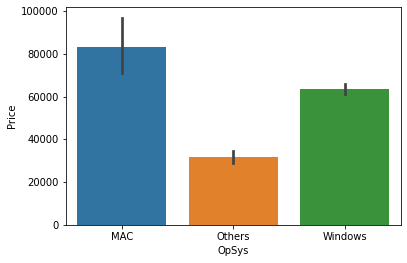

In [666]:
sns.barplot(
    data = data,
    x = 'OpSys',
    y = 'Price'
)

In [667]:
data

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,touch_screen,ips_panel,xres,yres,Cpu Name,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,Apple,Ultrabook,13.3,8,MAC,1.37,71378.6832,0,1,2560,1600,Intel Core i5,0,0,0,128
1,Apple,Ultrabook,13.3,8,MAC,1.34,47895.5232,0,0,1440,900,Intel Core i5,128,0,0,0
2,HP,Notebook,15.6,8,Others,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,0,0,256
3,Apple,Ultrabook,15.4,16,MAC,1.83,135195.3360,0,1,2880,1800,Intel Core i7,0,0,0,512
4,Apple,Ultrabook,13.3,8,MAC,1.37,96095.8080,0,1,2560,1600,Intel Core i5,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.8,33992.6400,1,1,1920,1080,Intel Core i7,0,0,0,128
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.3,79866.7200,1,1,3200,1800,Intel Core i7,0,0,0,512
1300,Lenovo,Notebook,14.0,2,Windows,1.5,12201.1200,0,0,1366,768,Other Intel Processor,64,0,0,0
1301,HP,Notebook,15.6,6,Windows,2.19,40705.9200,0,0,1366,768,Intel Core i7,0,1,0,0


In [688]:
from sklearn.linear_model import LinearRegression, LassoRegression
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'LassoRegression' from 'sklearn.linear_model' (C:\Users\97798\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [670]:
X = data.drop(['Price'], axis =1)

In [671]:
X

,Company,TypeName,Inches,Ram,OpSys,Weight,touch_screen,ips_panel,xres,yres,Cpu Name,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,Apple,Ultrabook,13.3,8,MAC,1.37,0,1,2560,1600,Intel Core i5,0,0,0,128
1,Apple,Ultrabook,13.3,8,MAC,1.34,0,0,1440,900,Intel Core i5,128,0,0,0
2,HP,Notebook,15.6,8,Others,1.86,0,0,1920,1080,Intel Core i5,0,0,0,256
3,Apple,Ultrabook,15.4,16,MAC,1.83,0,1,2880,1800,Intel Core i7,0,0,0,512
4,Apple,Ultrabook,13.3,8,MAC,1.37,0,1,2560,1600,Intel Core i5,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.8,1,1,1920,1080,Intel Core i7,0,0,0,128
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.3,1,1,3200,1800,Intel Core i7,0,0,0,512
1300,Lenovo,Notebook,14.0,2,Windows,1.5,0,0,1366,768,Other Intel Processor,64,0,0,0
1301,HP,Notebook,15.6,6,Windows,2.19,0,0,1366,768,Intel Core i7,0,1,0,0


In [672]:
y = data.Price

In [673]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [674]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
                                                   )

In [675]:
X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,touch_screen,ips_panel,xres,yres,Cpu Name,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
10,HP,Notebook,15.6,4,Others,1.86,0,0,1366,768,Intel Core i5,0,500,0,0
147,Asus,Notebook,15.6,4,Windows,2,0,0,1920,1080,Other Intel Processor,0,1,0,0
1287,HP,Notebook,15.6,6,Windows,2.19,0,0,1366,768,Intel Core i7,0,1,0,0
767,Dell,Gaming,15.6,16,Windows,2.72,1,1,4,2160,Intel Core i7,0,0,0,128
816,Razer,Ultrabook,12.5,16,Windows,1.29,1,1,4,2160,Intel Core i7,0,0,0,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,15.6,8,Windows,2.4,0,0,1920,1080,Intel Core i5,0,0,0,256
1130,HP,Notebook,15.6,8,Windows,2.04,0,0,1366,768,Intel Core i7,0,1,0,0
1294,HP,Notebook,15.6,6,Windows,2.04,0,0,1920,1080,AMD Processor,0,0,1,0
860,Lenovo,Notebook,15.6,8,Windows,2.3,0,1,1920,1080,Intel Core i5,0,1,0,0


In [676]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [736]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the ColumnTransformer with one-hot encoding and standardization
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 4, 10]),
    ],
    remainder='passthrough'
)

# Define the LinearRegression model
step2 = LinearRegression(fit_intercept=True)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Define the parameter grid for hyperparameter tuning

pipe.fit(X_train, y_train)# Perform grid search with cross-validation

# Evaluate the best model on the test set
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)
print(r2_score(y_test,y_pred))


Best hyperparameters: {'step2__fit_intercept': True}
Root Mean Squared Error (RMSE): 19501.926487252862
0.736229814521099


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [737]:
pipe.fit(X_train, y_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 10])])),
                ('step2', LinearRegression())])

In [738]:
y_pred = pipe.predict(X_test)

In [739]:
y_pred

array([ 59731.    ,  56381.875 ,  31278.8125,  56312.9375,  59101.0625,
        70235.9375,  36904.125 ,  24937.1875,  76761.    ,  30518.6875,
       127213.75  ,  35559.9375,  80665.875 ,  34183.125 ,  91910.875 ,
        73200.875 ,  95269.0625,  47152.4375,  55124.25  , 100394.1875,
       113264.375 ,  34579.4375,  70619.6875,  18372.8125,  71700.5625,
        72659.1875,  30462.5   ,  30118.6875,  70085.    ,  52775.9375,
        28160.9375,  82211.625 ,  84973.8125,  68648.    ,  63812.1875,
        44878.625 ,  41866.625 ,  31908.    ,  71307.4375,   -800.25  ,
        88786.25  ,  39755.625 ,  51453.75  , 110208.    ,  25376.8125,
        52775.9375, 101859.4375,  16579.3125,  55985.125 ,  72330.1875,
        70545.6875,  29525.9375,  36577.    ,  39555.5625,  38907.1875,
        80005.125 ,  16579.3125,  68508.6875,  50691.9375,  56312.9375,
        76687.375 ,  53529.9375,  20942.625 ,  39959.375 ,  16575.8125,
        89962.4375,  31639.3125,  63487.75  ,  69875.625 , 14592

In [740]:
pd.DataFrame(
    {
        'Actual': y_test,
        'Predicted':y_pred
    }
)

,Actual,Predicted
479,89084.1600,59731.0000
1022,61218.7200,56381.8750
298,26586.7200,31278.8125
1265,47898.7200,56312.9375
774,66280.3200,59101.0625
...,...,...
1058,69210.7200,82230.3125
199,55677.6000,62205.5625
297,153705.3408,136840.3125
411,103523.0400,93928.6875


In [741]:
print('R2 Score', r2_score(y_test, y_pred))
print('MAE Score', mean_absolute_error(y_test, y_pred))

R2 Score 0.736229814521099
MAE Score 12930.35232605364
